# Linear Regression

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston,load_diabetes
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
boston_dataset = load_boston()

In [3]:
df = pd.DataFrame(data=boston_dataset['data'],columns=boston_dataset.feature_names)
df['target'] = boston_dataset["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


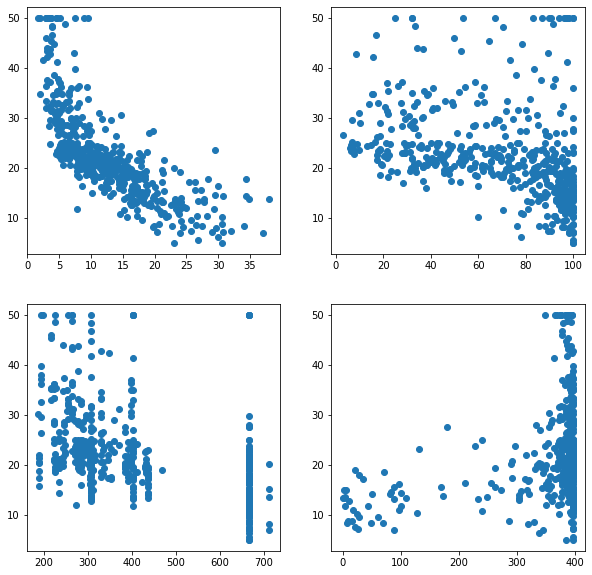

In [4]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(2,2,1).scatter(df["LSTAT"],df["target"])
fig.add_subplot(2,2,2).scatter(df["AGE"],df["target"])
fig.add_subplot(2,2,3).scatter(df["TAX"],df["target"])
fig.add_subplot(2,2,4).scatter(df["B"],df["target"])
plt.show()

- Shape of X
            
           X = (m,n)
           where 
               m = number of samples 
               n = number of features 


- choosing LSTAT for feature column X           
- setup X_0 (column 0 as 1) for linear regression ( theta_0 * X_0 + theta_1 * X_1  = theta_0 + theta_1 * X_1 )

In [5]:
def linear_model_format_X(X):
    if len(X.shape) == 1:
        X = X.copy().reshape(-1,1)
    
    return np.hstack(tup= ( np.ones(shape=(X.shape[0],1)) , X ) )

In [6]:
X_i = df['LSTAT'].values
X = linear_model_format_X(X_i)
y = df.target.values.reshape(-1,1)

print(X.shape, y.shape)

(506, 2) (506, 1)


In [7]:
n = X.shape[1]
m = y.shape[0]
print("number of columns (features) :",n)
print("number of samples (rows) :",m)

number of columns (features) : 2
number of samples (rows) : 506


## Using Gradient Descent

m = number of training samples(number of rows)
X = input features(matrix)
y = output target(matrix)


                training-set
                    |
                    V
                Learning algorithm
                    |
                    V
        test --->   h  ---> estimation
                (hypothesis)
        
        
`h(x) = theta0 + theta1 * X`

Affine Function = linear function + a constant

![linear_reg1](./images/linear_reg1.png)

In [8]:
def regression_cost_func(y_pred,y):
    return np.sum(np.square(y_pred - y)) / ( 2 * y_pred.shape[0])

### Gradient Descent Alogrithm

![linear_reg4](./images/linear_reg4.png)

### Gradient Descent intuition
![linear_reg2](./images/linear_reg2.png)

![linear_reg5](./images/linear_reg5.png)

In [9]:
def linear_regression_fit(X_i,y,alpha = 0.01,iterations = 10000):    
    X = linear_model_format_X(X_i)
    
    n = X.shape[1]
    m = y.shape[0]
    
    theta = np.random.rand(1,n) * 0.0001
    print("random initial theta value :",theta)

    cost_history = []
    theta_history = []

    for iteration in range(iterations):

        # calculate y_pred 
        y_pred = X @ theta.T # (m,1) = (m,n) * (n,1)

        # new theta to replace old theta
        new_theta = np.zeros_like(theta)

        # for linear regression with n = 2 
        # it will only run for theta at 0 column and theta at 1 column
        # simultaneous operation 
        new_theta = theta - (alpha * np.sum( ( y_pred - y ) * X, axis = 0 ) * (1 / m))

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override new theta 
        theta = new_theta

        # calculate cost to put in history
        cost = regression_cost_func( X @ theta.T, y)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
        
    y_pred = X @ theta.T
    return X,y,y_pred,theta,theta_history,cost_history

#### linear regression error function vs weights graph
![linear_reg3](./images/linear_reg3.png)

### debugging of gradient descent learning 

![linear_reg6](./images/linear_reg6.png)

if learning rate is big the theta value will shoot out.

### Mean Squared Error / Root Mean Squared Error

In [10]:
def mse_calculation(y_pred,y):
    m = y.shape[0]
    mean_squared_error = np.sum(np.square(y_pred - y)) * (1/m)
    return mean_squared_error,mean_squared_error ** (1/2)

### Code implemnentation

#### learning rate 0.01

random initial theta value : [[2.54564332e-05 6.46402334e-05]]


/home/nishant/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-8-69659341ffd9>:2: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(y_pred - y)) / ( 2 * y_pred.shape[0])


breaking. found inf or nan.
MSE : inf RMSE : inf
trained theta value : [[-1.01794457e+302 -1.69552245e+303]]


<ipython-input-10-0024ddfb6611>:3: RuntimeWarning: overflow encountered in square
  mean_squared_error = np.sum(np.square(y_pred - y)) * (1/m)


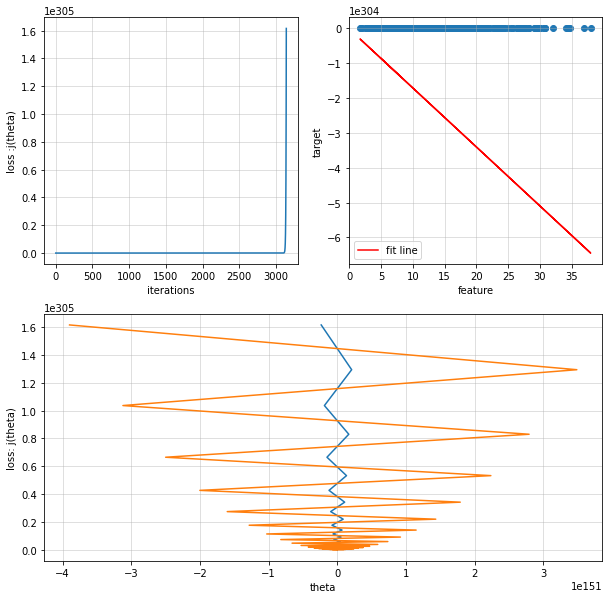

In [11]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

X,y,y_pred,theta,theta_history,cost_history = linear_regression_fit(X_i,y,alpha = 0.01,iterations = 10000)


mse,rmse = mse_calculation(y_pred,y)

print("MSE :",mse,"RMSE :",rmse)

print("trained theta value :",theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(theta)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="feature",
    ylabel="target"
)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r',label="fit line")
ax.legend(loc="best")
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(theta)",
    xlabel="theta"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

- learning rate is high based on the data, and theta didn't converge and loss increased

#### learning rate 0.001

random initial theta value : [[2.95570864e-05 4.25401841e-05]]
MSE : 40.826302401049986 RMSE : 6.389546337655748
trained theta value : [[31.43697472 -0.76292137]]


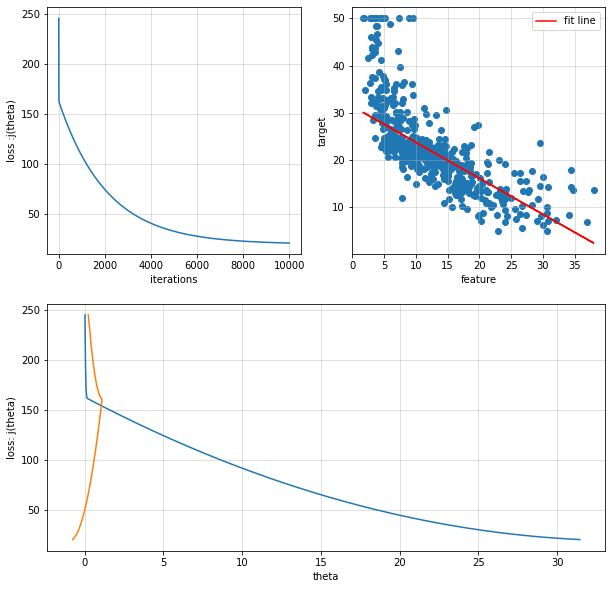

In [12]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

X,y,y_pred,theta,theta_history,cost_history = linear_regression_fit(X_i,y,alpha = 0.001,iterations = 10000)

mse,rmse = mse_calculation(y_pred,y)

print("MSE :",mse,"RMSE :",rmse)

print("trained theta value :",theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(theta)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="feature",
    ylabel="target"
)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r',label="fit line")
ax.legend(loc="best")
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(theta)",
    xlabel="theta"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

#### learning rate 0.003

random initial theta value : [[2.77082871e-05 7.66886386e-05]]
MSE : 38.48312304231967 RMSE : 6.203476689915073
trained theta value : [[34.52842518 -0.94852347]]


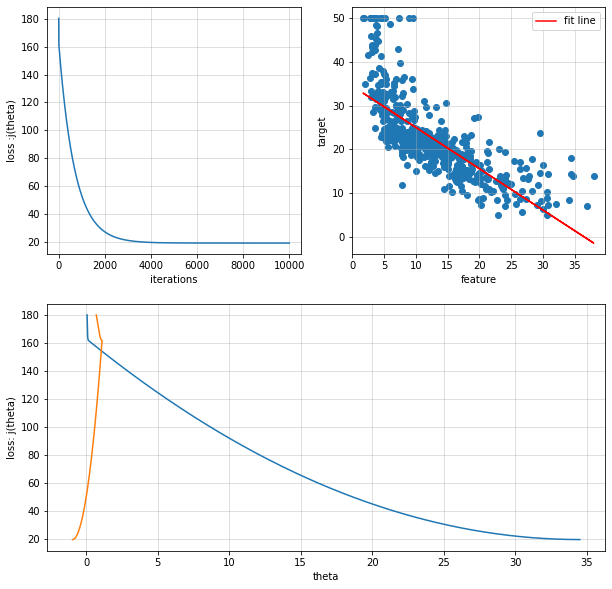

In [13]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

X,y,y_pred,theta,theta_history,cost_history = linear_regression_fit(X_i,y,alpha = 0.003,iterations = 10000)

mse,rmse = mse_calculation(y_pred,y)

print("MSE :",mse,"RMSE :",rmse)

print("trained theta value :",theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(theta)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="feature",
    ylabel="target"
)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r',label="fit line")
ax.legend(loc="best")
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(theta)",
    xlabel="theta"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

- 0.003 > 0.001. So on 0.003 it will converge earlier. 

## Using Normal Equation

```math
theta = (X^T * X)^-1 * X^T * y
```

In [14]:
X_i = df['LSTAT'].values
X = linear_model_format_X(X_i)
y = df.target.values.reshape(-1,1)

print(X.shape, y.shape)

(506, 2) (506, 1)


In [15]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y

theta.shape

(2, 1)

In [16]:
y_pred = X @ theta

y_pred.shape

(506, 1)

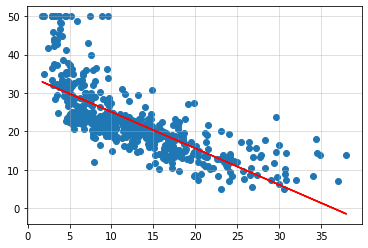

In [17]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r')
ax.grid(alpha=0.5)
plt.show()

# Ridge(L2 Regularization) Regression
 

In [18]:
def ridge_regression_fit(X_i,y,alpha = 0.01,iterations = 10000,penalty=0.1):    
    X = linear_model_format_X(X_i)
    
    n = X.shape[1]
    m = y.shape[0]
    
    theta = np.random.rand(1,n) * 0.001
    print("random initial theta value :",theta)

    cost_history = []
    theta_history = []

    for iteration in range(iterations):

        # calculate y_pred 
        y_pred = X @ theta.T # (m,1) = (m,n) * (n,1)

        # new theta to replace old theta
        new_theta = np.zeros_like(theta)

        # for linear regression with n = 2 
        # it will only run for theta at 0 column and theta at 1 column
        # simultaneous operation 
        new_theta = theta - (alpha * np.sum( ( y_pred - y ) * X, axis = 0 ) * (1 / m)) -  (penalty * theta * (1 / m) )

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override new theta 
        theta = new_theta

        # calculate cost to put in history
        cost = regression_cost_func( X @ theta.T, y)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
        
    y_pred = X @ theta.T
    return X,y,y_pred,theta,theta_history,cost_history

random initial theta value : [[0.0008258  0.00015862]]
MSE : 51.76937308514516 RMSE : 7.1950936814710875
trained theta value : [[27.13210478 -0.50481865]]


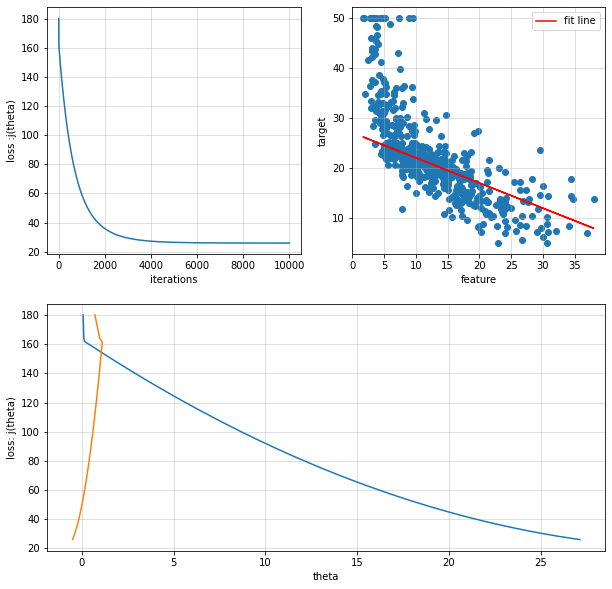

In [19]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

X,y,y_pred,theta,theta_history,cost_history = ridge_regression_fit(X_i,y,alpha = 0.003,iterations = 10000,penalty=0.1)

mse,rmse = mse_calculation(y_pred,y)

print("MSE :",mse,"RMSE :",rmse)

print("trained theta value :",theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(theta)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="feature",
    ylabel="target"
)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r',label="fit line")
ax.legend(loc="best")
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(theta)",
    xlabel="theta"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

## Using Normal Equation

```math
theta = (X^T * X + lambda * I)^-1 * X^T * y
```

In [20]:
X_i = df['LSTAT'].values
X = linear_model_format_X(X_i)
y = df.target.values.reshape(-1,1)

In [21]:
penalty = 0.1

theta = np.linalg.inv(X.T @ X + (penalty * np.identity(X.shape[1]) ) ) @ X.T @ y

theta.shape

(2, 1)

In [22]:
y_pred = X @ theta

y_pred.shape

(506, 1)

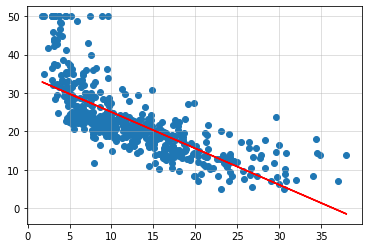

In [23]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r')
ax.grid(alpha=0.5)
plt.show()

# Lasso(L1 Regularization) Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are scost_historyk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [24]:
def lasso_regression_fit(X_i,y,alpha = 0.01,iterations = 10000,penalty=0.1):
    
    X = linear_model_format_X(X_i)
    
    n = X.shape[1]
    m = y.shape[0]
    
    theta = np.random.rand(1,n) * 0.001
    print("random initial theta value :",theta)

    cost_history = []
    theta_history = []

    for iteration in range(iterations):

        # calculate y_pred 
        y_pred = X @ theta.T # (m,1) = (m,n) * (n,1)

        # new theta to replace old theta
        new_theta = np.zeros_like(theta)

        # for linear regression with n = 2 
        # it will only run for theta at 0 column and theta at 1 column
        # simultaneous operation 
        new_theta = theta - (alpha * np.sum( ( y_pred - y ) * X, axis = 0 ) * (1 / m)) - (penalty / m)  

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override new theta 
        theta = new_theta

        # calculate cost to put in history
        cost = regression_cost_func( X @ theta.T, y)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
        
    y_pred = X @ theta.T
    return X,y,y_pred,theta,theta_history,cost_history

random initial theta value : [[0.00080492 0.00036726]]
MSE : 38.50216340937797 RMSE : 6.20501115304219
trained theta value : [[34.27188639 -0.93345136]]


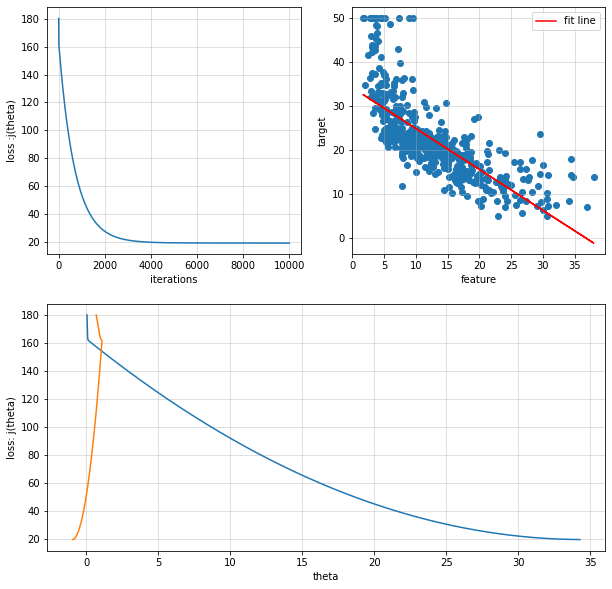

In [25]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

X,y,y_pred,theta,theta_history,cost_history = lasso_regression_fit(X_i,y,alpha = 0.003,iterations = 10000,penalty=0.1)

mse,rmse = mse_calculation(y_pred,y)

print("MSE :",mse,"RMSE :",rmse)

print("trained theta value :",theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(theta)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="feature",
    ylabel="target"
)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r',label="fit line")
ax.legend(loc="best")
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(theta)",
    xlabel="theta"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

# Comparing Linear, Lasso, Ridge Regression 

In [26]:
X_i = df[["RM","AGE","DIS","LSTAT"]].values
y = boston_dataset.target.reshape(-1,1)

X_i.shape,y.shape

((506, 4), (506, 1))

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_i,y,random_state=42,test_size=30)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((476, 4), (30, 4), (476, 1), (30, 1))

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)

X_scaled_test = linear_model_format_X(X=scaler.transform(X_test))

X_scaled.shape,X_scaled_test.shape

((476, 4), (30, 5))

## linear regression model training

random initial theta value : [[7.36264350e-05 8.47550852e-05 3.91738248e-05 6.92675615e-05
  5.17027397e-05]]
MSE : 30.30458066852098 RMSE : 5.504959642769507
trained theta value : [[22.69146735  3.53757652 -0.67498011 -1.42074917 -4.91623619]]


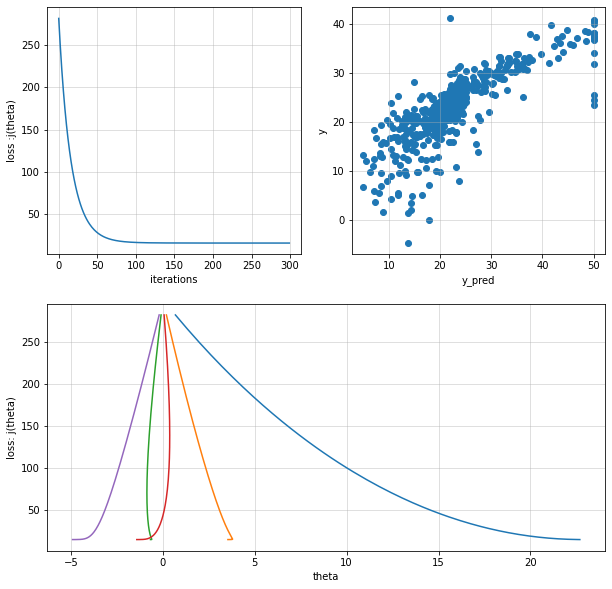

In [29]:
X_linear,y_linear,y_pred_linear,theta_linear,theta_history_linear,cost_history_linear = linear_regression_fit(
    X_scaled,
    y_train,
    alpha = 0.03,
    iterations = 300
)

mse,rmse = mse_calculation(y_pred_linear,y_linear)

print("MSE :",mse,"RMSE :",rmse)

print("trained theta value :",theta_linear)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(theta)"
)
ax.plot(cost_history_linear)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)

ax.scatter(y_linear,y_pred_linear)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(theta)",
    xlabel="theta"
)
ax.plot(theta_history_linear,cost_history_linear)
ax.grid(alpha=0.5)
plt.show()

## lasso regression model training

random initial theta value : [[4.01936183e-04 3.05106002e-04 6.70376883e-04 1.45538044e-04
  7.46693908e-05]]
MSE : 30.301562630547078 RMSE : 5.504685516044225
trained theta value : [[22.68446533  3.52019216 -0.69449328 -1.44777925 -4.93533609]]


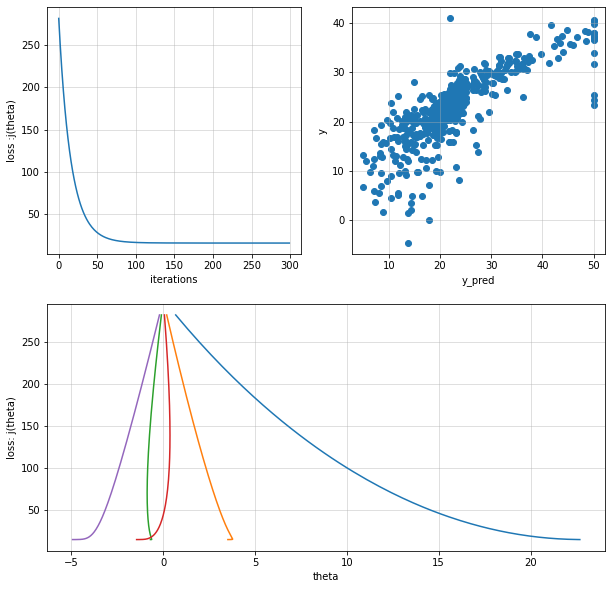

In [30]:
X_lasso,y_lasso,y_pred_lasso,theta_lasso,theta_history_lasso,cost_history_lasso = lasso_regression_fit(
    X_scaled,
    y_train,
    alpha = 0.03,
    iterations = 300
)

mse,rmse = mse_calculation(y_pred_lasso,y_lasso)

print("MSE :",mse,"RMSE :",rmse)

print("trained theta value :",theta_lasso)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(theta)"
)
ax.plot(cost_history_lasso)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_lasso,y_pred_lasso)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(theta)",
    xlabel="theta"
)
ax.plot(theta_history_lasso,cost_history_lasso)
ax.grid(alpha=0.5)
plt.show()

## ridge regression model training

random initial theta value : [[0.00051806 0.00021876 0.00056487 0.000882   0.00081895]]
MSE : 30.33615129425656 RMSE : 5.507826367475336
trained theta value : [[22.53382105  3.53191207 -0.67387799 -1.38887304 -4.87236733]]


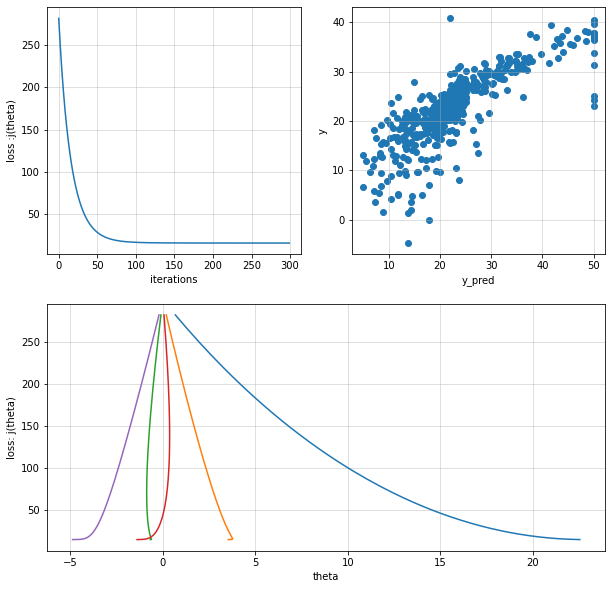

In [31]:
X_ridge,y_ridge,y_pred_ridge,theta_ridge,theta_history_ridge,cost_history_ridge = ridge_regression_fit(
    X_scaled,
    y_train,
    alpha = 0.03,
    iterations = 300
)

mse,rmse = mse_calculation(y_pred_ridge,y_ridge)

print("MSE :",mse,"RMSE :",rmse)

print("trained theta value :",theta_ridge)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(theta)"
)
ax.plot(cost_history_ridge)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_ridge,y_pred_ridge)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(theta)",
    xlabel="theta"
)
ax.plot(theta_history_ridge,cost_history_ridge)
ax.grid(alpha=0.5)
plt.show()

## linear regression model testing error

In [32]:
y_test_pred_linear = X_scaled_test @ theta_linear.T
mse,rmse = mse_calculation(y_test_pred_linear,y_test)
print("MSE :",mse,"RMSE :",rmse)

MSE : 19.026988523356625 RMSE : 4.361993640911988


## ridge regression model testing error

In [33]:
y_test_pred_ridge = X_scaled_test @ theta_ridge.T
mse,rmse = mse_calculation(y_test_pred_ridge,y_test)
print("MSE :",mse,"RMSE :",rmse)

MSE : 18.860872728792696 RMSE : 4.342910628690475


## lasso regression model testing error

In [34]:
y_test_pred_lasso = X_scaled_test @ theta_lasso.T
mse,rmse = mse_calculation(y_test_pred_lasso,y_test)
print("MSE :",mse,"RMSE :",rmse)

MSE : 19.086563510343435 RMSE : 4.368817175202395


## training data comparison

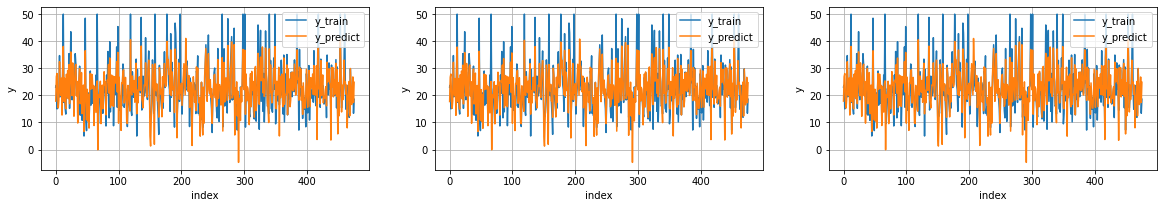

In [40]:
fig = plt.figure(figsize=(20,3))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_linear,label="y_predict")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_ridge,label="y_predict")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_lasso,label="y_predict")
ax.legend(loc="best")
ax.grid()

plt.show()

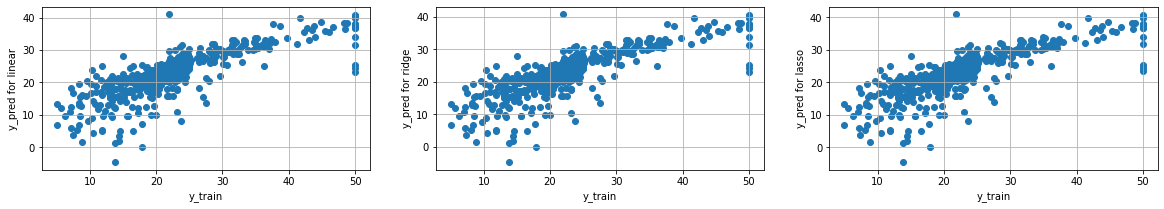

In [42]:
fig = plt.figure(figsize=(20,3))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_train",ylabel="y_pred for linear")
ax.scatter(y_train,y_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_train",ylabel="y_pred for ridge")
ax.scatter(y_train,y_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_train",ylabel="y_pred for lasso")
ax.scatter(y_train,y_pred_lasso)
ax.grid()

plt.show()

## testing data comparison

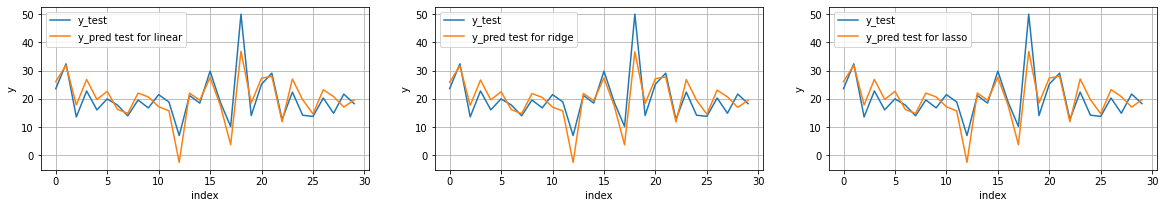

In [44]:
fig = plt.figure(figsize=(20,3))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_linear,label="y_pred test for linear")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_ridge,label="y_pred test for ridge")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_lasso,label="y_pred test for lasso")
ax.legend(loc="best")
ax.grid()


plt.show()

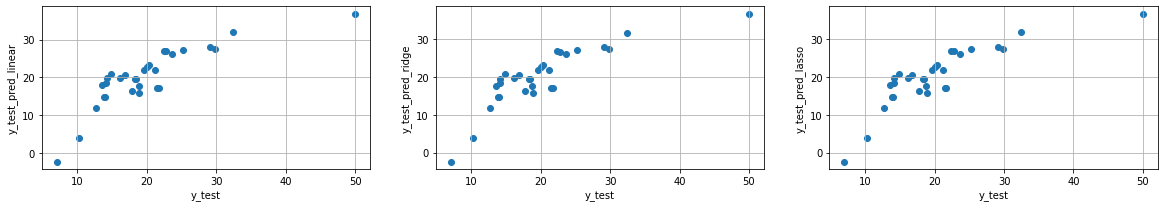

In [45]:
fig = plt.figure(figsize=(20,3))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_test",ylabel="y_test_pred_linear")
ax.scatter(y_test,y_test_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_test",ylabel="y_test_pred_ridge")
ax.scatter(y_test,y_test_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_test",ylabel="y_test_pred_lasso")
ax.scatter(y_test,y_test_pred_lasso)
ax.grid()

plt.show()

## models comparison

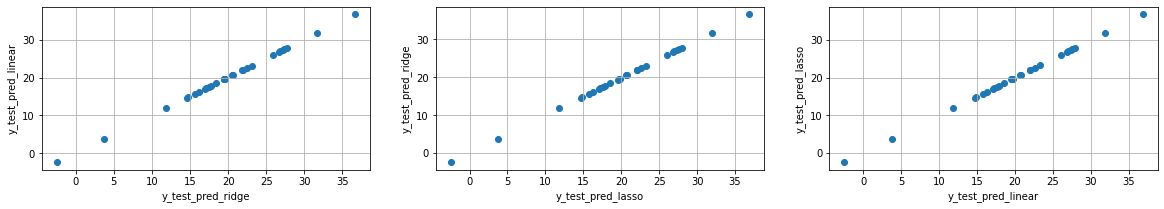

In [46]:
fig = plt.figure(figsize=(20,3))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_test_pred_ridge",ylabel="y_test_pred_linear")
ax.scatter(y_test_pred_ridge,y_test_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_test_pred_lasso",ylabel="y_test_pred_ridge")
ax.scatter(y_test_pred_lasso,y_test_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_test_pred_linear",ylabel="y_test_pred_lasso")
ax.scatter(y_test_pred_linear,y_test_pred_lasso)
ax.grid()

plt.show()